## Assignment10_LastName_FirstName 
## Due date: Friday, April 2 at 11:59pm

###  Use the following format for homework filename:  

`Assignment10_LastName_FirstName.ipynb`


#### - This assignment is worth 27 points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *    
import math

**Problem 1** (7 pts): There are many methods for finding numerical solutions to differential equations of the form $y'=f(x,y)$, an example is the following formula:
$$y_{n+1} = y_n + \frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$
where 
\begin{align}
k_1 &= hf(x_n,y_n)\\
k_2 &= hf(x_n+ 0.5h,y_n+0.5k_1)\\
k_3 &=hf(x_n+0.5h,y_n+0.5k_2)\\
k_4 &= hf(x_n+h,y_n+k_3)
\end{align}

You are advised to look carefully at the formula; note that $k_2$ depends on $k_1$, $k_3$ depends on $k_2$, and $k_4$ depends on $k_3$. The program you implement in part (a) will use the formula above to compute the approximate solution of the differential equation $y'=2xy$.


(a) The value of $x_n$ for $n=0 \cdots 5$ is given in the table below:

| $x_0$  |  $x_1$ |  $x_2$ |  $x_3$|  $x_4$  |  $x_5$ |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
 | 1 | 1.1 | 1.2| 1.3  | 1.4 | 1.5 |
 
Suppose that $y_0=1$, $h=0.1$, $f(x,y) = 2xy$, write a program to compute the value of $y_n$ for $n=0 \cdots 5$. Use the formula for $y_{n+1}$ above. Observe that the formula for $y_{n+1}$ is a recursive relation.


(b) The global truncation error for the formula above is:

$$ \text{error} = Y^{(5)}(c)\frac{h^5}{5!},$$
where $Y(x) = e^{x^2-1}$  is the exact solution of the differential equation $y'=2xy$ with the conditions specified above. 

Calculate the global truncation error for the method. Use $h=0.1$ and $c=1.3$. Note  that $Y^{(5)}$ represents the fifth derivative of $Y(x)$. You must show work to receive credit.

(c) Compare the exact solution $Y(x) = e^{x^2-1}$ at $x=x_n$ for $n=0 \cdots 5$ to your computed solution from part (a) by plotting both on the same graph. Describe your observation(s). 

In [2]:
# present your code for problem 1
def f1(x,y):
    return 2*x*y

x = [1,1.1,1.2,1.3,1.4,1.5]
h = .1
y = [1]
for i in range(5):
    k1 = h*f1(x[i],y[i])
    k2 = h*f1(x[i]+.5*h,y[i]+.5*k1)
    k3 = h*f1(x[i]+.5*h,y[i]+.5*k2)
    k4 = h*f1(x[i]+h,y[i]+k3)
    yn = y[i]+(k1+2*k2+2*k3+k4)/6
    y.append(yn)

In [3]:
print(x)
print(y)

[1, 1.1, 1.2, 1.3, 1.4, 1.5]
[1, 1.23367435, 1.5526953980477614, 1.9936867693499598, 2.611633233219414, 3.4902106363729497]


1 derivative of $e^{x^2-1}$: $2xe^{x^2-1}$

2 derivative of $2xe^{x^2-1}$: $e^{x^2-1}(4x^2+2)$

3 derivative of $e^{x^2-1}(4x^2+2)$: $4e^{x^2-1}x(2x^2+3)$

4 derivative of $4e^{x^2-1}x(2x^2+3)$ : $4e^{x^2-1}(4x^4+12x^2+3)$

5 derivative of $4e^{x^2-1}(4x^4+12x^2+3)$: $8e^{x^2-1}x(4x^4+20x^2+15)$

In [4]:
def f2(x):
    return (8*np.exp((x**2)-1)*(4*(x**5)+20*(x**3)+15*x))

c=1.3
y2 = [1]
for i in range(5):
    yn = (f2(x[i])*c*(h**5))/120
    y2.append(yn)
print(y2)

[1, 3.3800000000000015e-05, 5.2991121174072066e-05, 8.412284496097764e-05, 0.0001352792291832091, 0.0002204460701458069]


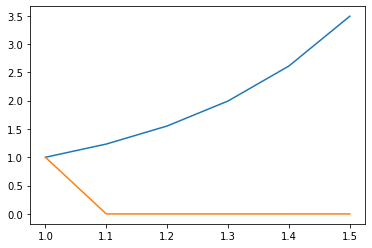

In [5]:
plt.plot(x,y)
plt.plot(x,y2)

**NOTE:** The following lines of code demonstrates how to use python and find the first and fifth derivative of a function $ y = e^{2x}$:

**Problem 2** (4 pts)
Write a program to calculate the combinations $C(n,k)$ without using any factorial, where 
$$C(n,k) = \begin{pmatrix} n \\ k\end{pmatrix} := \frac{n!}{k!(n-k)!}.
$$
Use a `for` loop, assume $n\ge k \ge 0$ are integers. 

In [6]:
# present your code for problem 2
def combinations(n,k):
    num=1
    den=1
    for i in range(1,n+1):
        num = num*i
        if i<=k:
            den = den*i
        if i<=(n-k):
            den = den*i
    return num/den

**Problem 3** (5 pts): Using the Secant Method, for $A>0$, 

(a) (4 pts) Write a program which finds $A^{1/m}$ for any positive value $m$.  Note, you need to choose a function $f(x)$ for the Secant Method whose root is $A^{1/m}$.  

(b) (1 pts) How does your choice of $m$ affect how many iterations your program takes to converge for a given tolerance choice?  Plots will help me to understand your thinking here.  

In [7]:
# present your code for problem 3a
#x^m -a
def function(x):
    m=2
    a=5
    return (x**m)-a
def secant(x1, x2, e, f):
    n = xm = x0 = c = 0
    if (f(x1) * f(x2) < 0):
        while True:
            x0 = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))
            c = f(x1) * f(x0)
            x1 = x2
            x2 = x0
            n += 1
            if (c == 0):
                break
            xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))) 
            if(abs(xm - x0) < e):
                break
        print(x0) 
    else:
        print("No roots in the interval")
A = 5
m = 5
secant(-25,25,.01,function)

No roots in the interval


In [8]:
# present your code for problem 3b

**Problem 4** (6pts)

[a.] Write a program to graph the *epitrochoid* curve with parametric equations

$$
x = 11 \cos(t) - 4 \cos \left( \frac{11t}{2} \right) \quad \text{ and } \quad y = 11 \sin(t) - 4 \sin\left( \frac{11t}{2} \right).
$$

Generate the plot over the interval $-2\pi \leq t \leq 2\pi$.

[b.] If a curve $C$ is described by the parametric equations 

$$
x=f(t), ~y=g(t), ~\alpha \leq t \leq \beta,
$$

where $f'$ and $g'$ are continuous on $[\alpha, \beta]$ and $C$ is traversed exactly once as $t$ increases from $\alpha$ to $\beta$, then the length of $C$ is

$$
L = \int_{\alpha}^{\beta} \sqrt{\left( \frac{dx}{dt} \right)^2 + \left( \frac{dy}{dt} \right)^2} ~ dt
$$


Use the Simpson’s Method with a number of interval $N = 10$ to estimate the length of the curve in part (a).

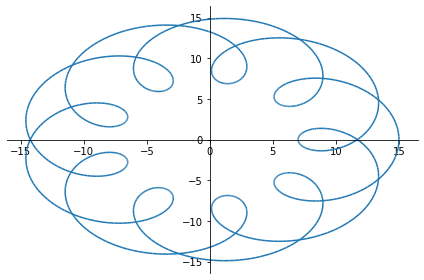

In [9]:
#problem 4a
t = symbols('t')
x4 = 11*cos(t)-4*cos(11*t/2)
y4 = 11*sin(t)-4*sin(11*t/2)
plot_parametric(x4, y4, (t, -2*pi, 2*pi))

**Problem 5** (5pts)

An automobile of mass $M = 4500$ kg is moving at a speed of $35$ m/s. The engine is disengaged suddenly at $t=0$ sec. Assume that the equation of motion after $t=0$ is given by

$$
4500 v \frac{dv}{dx} = -8.276v^2 -2000
$$

where $v=v(t)$ is the speed (m/sec) of the car at $t$. The left side represents $Mv~(dv/dx)$. The first term on the right is the aerodynamic drag, and the second term is the rolling resistance of the tires. Calculate how far the car travels until the speed reduces to $15$ m/sec. (Hint: The equation of motion may be integrated as:

$$
\int_{15}^{35} \frac{4500 v}{8.276v^2 +2000}\ dv = \int dx = x
$$

Evaluate the equation above using the Trapezoid Method.

In [10]:
#Problem 5
def m(v):
    return (4500*v)/(8.276*(v**2)+2000)
def trap(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h
trap(m,15,35,10000)

311.3292562109126